In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

states = pd.read_csv('../input/daily-power-generation-in-india-20172020/State_Region_corrected.csv')
data = pd.read_csv("../input/daily-power-generation-in-india-20172020/file.csv")

<p style="font-size:16px">India is the world's third largest producer and third largest consumer of electricity. The national electric grid in India has an installed capacity of 370.106 GW as of 31 March 2020. Renewable power plants, which also include large hydroelectric plants, constitute 35.86% of India's total installed capacity. During the 2018-19 fiscal year, the gross electricity generated by utilities in India was 1,372 TWh and the total electricity generation (utilities and non utilities) in the country was 1,547 TWh. The gross electricity consumption in 2018-19 was 1,181 kWh per capita. In 2015-16, electric energy consumption in agriculture was recorded as being the highest (17.89%) worldwide. The per capita electricity consumption is low compared to most other countries despite India having a low electricity tariff.</p>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Electricity_generation_chart.jpg/440px-Electricity_generation_chart.jpg" height="900px" width="600px">

# Description of Data

In [2]:
# quick look at the data

data.head(3)

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78


The unit MU stands for Mega Unit i.e one million unit of electricity where one unit signifies one kilowatt hour.

In [3]:
#changing thermal generation values to numerical values

data['Thermal Generation Actual (in MU)'] = data['Thermal Generation Actual (in MU)'].str.replace(',','').astype('float')
data['Thermal Generation Estimated (in MU)'] = data['Thermal Generation Estimated (in MU)'].str.replace(',','').astype('float')

In [4]:
# description of data

data.describe(include='all')

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
count,4635,4635,4635.000000,4635.000000,2781.000000,2781.000000,4635.000000,4635.000000
unique,927,5,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-29,Western,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,927,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,602.311107,578.086434,36.993085,36.925868,71.496945,74.311400
std,NaN,NaN,382.631956,384.556749,15.996135,11.676400,71.171101,78.360818
min,NaN,NaN,12.340000,12.380000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,469.740000,433.300000,25.800000,30.190000,26.090000,22.915000
50%,NaN,NaN,615.280000,539.860000,30.720000,34.720000,46.260000,48.370000
75%,NaN,NaN,683.490000,673.505000,46.830000,42.900000,86.010000,95.745000


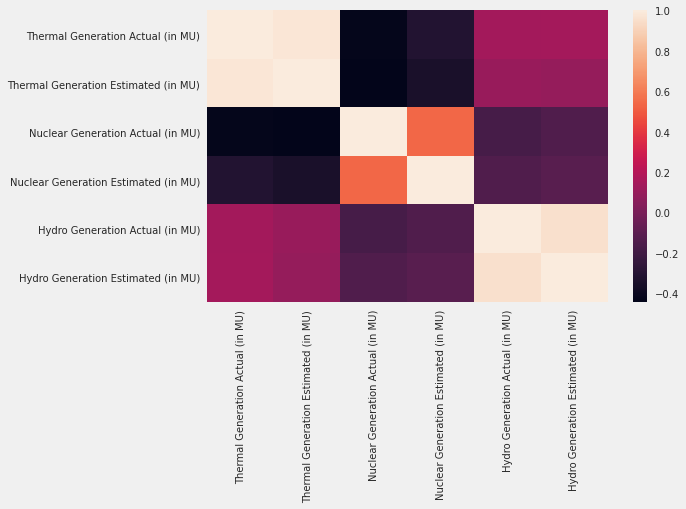

In [5]:
# correlation in the data

sns.heatmap(data.corr())

# Fixing missing values

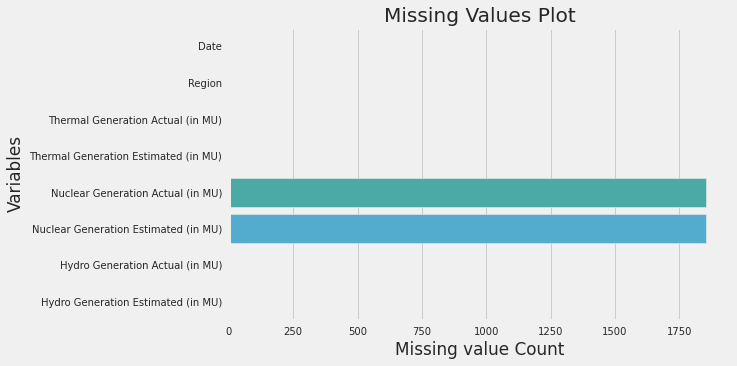

In [6]:
# checking for null values

plt.title('Missing Values Plot')
sns.barplot(data=data.isnull().sum().reset_index(), y='index', x=0)
plt.ylabel('Variables')
plt.title('Missing Values Plot')
plt.xlabel('Missing value Count')
plt.show()

Nuclear Generation is not done by many of the states and hence it can assumed that values which are missing are actually 0. 

And since the values are NaN in both the nuclear variables, both of the values can be replaced by 0.0

In [7]:
#filling the missing values

data = data.fillna(0.0)

In [8]:
# dropping duplicate values(if any)

data = data.drop_duplicates()

# Distribution and outliers

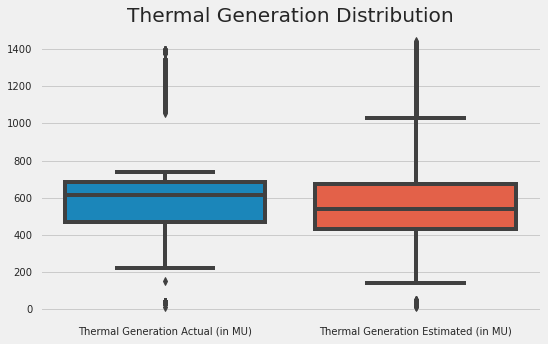

In [9]:
features = data.columns[2:].tolist()

sns.boxplot(data=data[features[:2]])
plt.title('Thermal Generation Distribution')
plt.show()

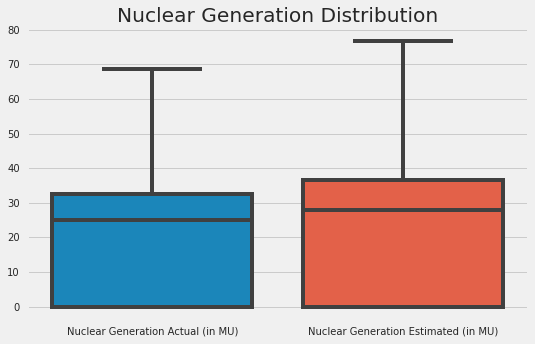

In [10]:
sns.boxplot(data=data[features[2:4]])
plt.title('Nuclear Generation Distribution')
plt.show()

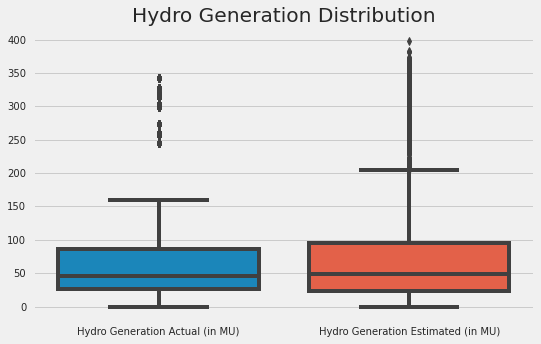

In [11]:
sns.boxplot(data=data[features[4:]])
plt.title('Hydro Generation Distribution')
plt.show()

Looking at the plot it seems that the hydro and thermal plots contain many outliers.

But I am assuming that most regions/or on most dates the generation ism't very high. So the most of the distribution came to be low.

And the places which produce the energy are getting treated as outliers.

The problem sn't happening with nuclear energy variables because it's values are already very low.